Ar turi ryšį sveikatos būklė ir atlyginimo dydis, lyginant sostinės ir uostamiesčio duomenis, taip pat lyginant 2010 ir 2020, ar dešimtmetis turėjo įtakos duomenų pokyčiui?

2020 m. atlikto metinio pajamų ir gyvenimo sąlygų statistinio tyrimo asmenų duomenys: https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/3241992693874a288fc168a3d1386050_0/explore 

2010 m. atlikto metinio pajamų ir gyvenimo sąlygų statistinio tyrimo asmenų duomenys: https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/afabc95b5b7240be8e3386c35475dd2f_0/explore 

1) Vilniaus ir Klaipėdos duomenų palyginimas (2020 metai)

In [1]:
import pandas as pd # pandas bibliotekos importavimas, reikalingas kiekviena karta pradedant darba naujame notebook_e ## pip instal pandas -- jeigu neveiktu pandas importas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ad2020 = pd.read_csv('AD_2020.csv') # lenteles pavadinimas, kuriai nuskaitome tekstini faila ir ji uzdarome

In [3]:
ad2010 = pd.read_csv('AD_2010.csv')

In [4]:
ad2020['Eurais'] = ad2020['py010n'].values
ad2010['Eurais'] = ad2010['py010n'].values/3.4528

In [5]:
ad2020.head(3) # ispausdina pirmas 3 eilutes

pb190  pe020  pl015  rl060  ph050       pb030  rl020  pl051         rb240  \
0    2.0    NaN    NaN    NaN    NaN  1000040002    NaN   75.0  1.000040e+09   
1    2.0    NaN    NaN    NaN    NaN  1000040003    NaN   54.0  1.000040e+09   
2    1.0    NaN    NaN    NaN    NaN  1000040004    NaN   81.0           NaN   

   ph010  ...  pl086  pl087  pl120  pl080  py120n  py140g  objectid  age  \
0    2.0  ...    0.0    0.0    NaN    0.0     0.0     0.0         1   48   
1    NaN  ...    0.0    0.0    NaN    0.0     0.0     0.0         2   46   
2    NaN  ...    0.0    0.0    NaN    0.0     0.0     0.0         3   27   

   py120g    Eurais  
0     0.0   7381.18  
1     0.0   7081.40  
2     0.0  15357.88  

[3 rows x 81 columns]

In [6]:
ad2010.head(3) # ispausdina pirmas 3 eilutes

pb190  pe020  pl015  rl060  ph050     pb030  rl020       rb240  ph010  \
0    2.0    NaN    NaN    NaN    NaN  10645101    NaN  10645103.0    2.0   
1    1.0    NaN    NaN    NaN    NaN  10645102    NaN         NaN    NaN   
2    2.0    NaN    1.0    NaN    NaN  10645103    NaN  10645101.0    3.0   

   pl130  ...  pl086  pl087  pl120  pl080  py120n  py140g  objectid  age  \
0   11.0  ...    0.0    0.0    NaN    0.0     0.0     0.0         1   54   
1    7.0  ...    0.0    0.0    3.0    0.0     0.0     0.0         2   26   
2    NaN  ...    0.0    0.0    NaN    0.0     0.0     0.0         3   50   

   py120g       Eurais  
0     0.0  3534.525602  
1     0.0  1265.060241  
2     0.0     0.000000  

[3 rows x 74 columns]

In [7]:
ad2020.info() 
# paraso, kiek irasu turime, kiek stulpeliu, 
# kiek stulpelyje yra irasu (nenuliniu reiksmiu) ir 
# matome tipa. 
# pvz. object, tai gali buti tekstas, sudetingesnis objektas. 
# Jeigu integer - skaicius. 
# jei float, tai skaicius, tik su kableliu. 
# 64 pazymi tiksluma. 
# Isvardinama, kokie tipai yra lenteleje,
# paskutinis - kiek kompiuterio atminties naudoja si lentele

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11354 entries, 0 to 11353
Data columns (total 81 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pb190     9876 non-null   float64
 1   pe020     716 non-null    float64
 2   pl015     4627 non-null   float64
 3   rl060     1174 non-null   float64
 4   ph050     242 non-null    float64
 5   pb030     11354 non-null  int64  
 6   rl020     678 non-null    float64
 7   pl051     8942 non-null   float64
 8   rb240     5714 non-null   float64
 9   ph010     6555 non-null   float64
 10  pl130     5086 non-null   float64
 11  pd050     9643 non-null   float64
 12  py080g    9881 non-null   float64
 13  pl090     9725 non-null   float64
 14  m_k       11354 non-null  int64  
 15  py020g    9881 non-null   float64
 16  pe030     9174 non-null   float64
 17  pd020     9643 non-null   float64
 18  ph060     4318 non-null   float64
 19  rl050     1174 non-null   float64
 20  pl100     403 non-null    fl

In [8]:
ad2010.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13235 entries, 0 to 13234
Data columns (total 74 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pb190     11606 non-null  float64
 1   pe020     1324 non-null   float64
 2   pl015     6476 non-null   float64
 3   rl060     1171 non-null   float64
 4   ph050     384 non-null    float64
 5   pb030     13235 non-null  int64  
 6   rl020     710 non-null    float64
 7   rb240     6930 non-null   float64
 8   ph010     9766 non-null   float64
 9   pl130     5118 non-null   float64
 10  pl050     10159 non-null  float64
 11  py080g    11606 non-null  float64
 12  pl090     11606 non-null  float64
 13  m_k       13235 non-null  int64  
 14  py020g    11606 non-null  float64
 15  pe030     11375 non-null  float64
 16  ph060     11436 non-null  float64
 17  rl050     1171 non-null   float64
 18  pl100     306 non-null    float64
 19  pl025     1136 non-null   float64
 20  rb230     4068 non-null   fl

In [9]:
ad2020['sl'] #aprasau panasiai kaip zodyne, t.y. su lauztiniais skliaustais ir kabutemis (tarsi print sakinys)

0        1
1        1
2        1
3        1
4        1
        ..
11349    7
11350    7
11351    7
11352    7
11353    7
Name: sl, Length: 11354, dtype: int64

In [10]:
ad2010['sl'] 

0        3
1        3
2        3
3        2
4        2
        ..
13230    1
13231    1
13232    1
13233    1
13234    1
Name: sl, Length: 13235, dtype: int64

In [11]:
vertes = ad2020['sl'].values # values - parametras (atributas), kad istrauktu vertes ir isdeliotu #print(vertes)
atl1 = ad2020[['sl', 'py010n']] # susikuriame nauja kintamuju lentele (per kableli, nes tai sarasas)

vertes = ad2010['sl'].values 
atl2 = ad2010[['sl', 'py010n']] 

In [12]:
ad2020['sl'] == 1

0         True
1         True
2         True
3         True
4         True
         ...  
11349    False
11350    False
11351    False
11352    False
11353    False
Name: sl, Length: 11354, dtype: bool

In [13]:
ad2010['sl'] == 1

0        False
1        False
2        False
3        False
4        False
         ...  
13230     True
13231     True
13232     True
13233     True
13234     True
Name: sl, Length: 13235, dtype: bool

In [14]:
ad2020[ad2020 ['sl'] == 1]

pb190  pe020  pl015  rl060  ph050       pb030  rl020  pl051  \
0       2.0    NaN    NaN    NaN    NaN  1000040002    NaN   75.0   
1       2.0    NaN    NaN    NaN    NaN  1000040003    NaN   54.0   
2       1.0    NaN    NaN    NaN    NaN  1000040004    NaN   81.0   
3       1.0    NaN    NaN    NaN    NaN  1000050001    NaN   23.0   
4       4.0    NaN    2.0    NaN    NaN  1000050003    NaN    NaN   
...     ...    ...    ...    ...    ...         ...    ...    ...   
9498    2.0    NaN    NaN    NaN    NaN  4008950001    NaN   91.0   
9499    2.0    NaN    NaN    NaN    NaN  4008950002    NaN   53.0   
9500    1.0   60.0    2.0    NaN    NaN  4008950004    NaN    NaN   
9501    2.0    NaN    1.0    NaN    NaN  4009000001    NaN   24.0   
9502    2.0    NaN    1.0    NaN    NaN  4009000002    NaN   12.0   

             rb240  ph010  ...  pl086  pl087  pl120  pl080  py120n  py140g  \
0     1.000040e+09    2.0  ...    0.0    0.0    NaN    0.0     0.0     0.0   
1     1.000040e+09    NaN  ...    0.0    0.0    NaN    0.0     0.0     0.0   
2              NaN    NaN  ...    0.0    0.0    NaN    0.0     0.0     0.0   
3              NaN    2.0  ...    0.0    0.0    NaN    0.0     0.0     0.0   
4              NaN    NaN  ...    0.0    0.0    NaN    0.0     0.0     0.0   
...            ...    ...  ...    ...    ...    ...    ...     ...     ...   
9498  4.008950e+09    4.0  ...    0.0    0.0    NaN    0.0     0.0     0.0   
9499  4.008950e+09    3.0  ...   11.0    0.0    2.0    0.0     0.0     0.0   
9500           NaN    NaN  ...    0.0   12.0    NaN    0.0     0.0     0.0   
9501  4.009000e+09    2.0  ...    0.0    0.0    NaN    0.0     0.0     0.0   
9502  4.009000e+09    2.0  ...    0.0    0.0    NaN    0.0     0.0     0.0   

      objectid  age  py120g    Eurais  
0            1   48     0.0   7381.18  
1            2   46     0.0   7081.40  
2            3   27     0.0  15357.88  
3            4   49     0.0  11203.52  
4            5   74     0.0      0.00  
...        ...  ...     ...       ...  
9498      9499   56     0.0  13496.02  
9499      9500   57     0.0   1263.14  
9500      9501   18     0.0      0.00  
9501      9502   68     0.0      0.00  
9502      9503   67     0.0      0.00  

[2231 rows x 81 columns]

In [15]:
ad2010[ad2010 ['sl'] == 1]

pb190  pe020  pl015  rl060  ph050     pb030  rl020       rb240  ph010  \
9        2.0    NaN    NaN    NaN    NaN  10645401    NaN  10645402.0    4.0   
10       2.0    NaN    NaN    NaN    NaN  10645402    NaN  10645401.0    2.0   
22       2.0    NaN    NaN    NaN    NaN  10646001    NaN  10646002.0    2.0   
23       2.0    NaN    NaN    NaN    NaN  10646002    NaN  10646001.0    2.0   
24       1.0    5.0    2.0    NaN    NaN  10646003    NaN         NaN    NaN   
...      ...    ...    ...    ...    ...       ...    ...         ...    ...   
13230    5.0    NaN    NaN    NaN    NaN  41544201    NaN         NaN    2.0   
13231    2.0    NaN    NaN    NaN    NaN  41572902    NaN  41572903.0    2.0   
13232    2.0    NaN    NaN    NaN    NaN  41572903    NaN  41572902.0    2.0   
13233    NaN    NaN    NaN    0.0    NaN  41572904    NaN         NaN    NaN   
13234    NaN    NaN    NaN    0.0    NaN  41572915    NaN         NaN    NaN   

       pl130  ...  pl086  pl087  pl120  pl080  py120n  py140g  objectid  age  \
9       13.0  ...    0.0    0.0    NaN    0.0     0.0     0.0        10   54   
10      12.0  ...    0.0    0.0    NaN    0.0     0.0     0.0        11   51   
22      13.0  ...    0.0    0.0    NaN   10.0     0.0     0.0        23   54   
23      13.0  ...    0.0    0.0    NaN    0.0     0.0     0.0        24   50   
24       NaN  ...    0.0   12.0    NaN    0.0     0.0     0.0        25   21   
...      ...  ...    ...    ...    ...    ...     ...     ...       ...  ...   
13230   13.0  ...    0.0    0.0    NaN    0.0     0.0     0.0     13231   53   
13231   11.0  ...    0.0    0.0    NaN    0.0     0.0     0.0     13232   39   
13232   11.0  ...    0.0    0.0    NaN    0.0     0.0     0.0     13233   30   
13233    NaN  ...    NaN    NaN    NaN    NaN     NaN     NaN     13234    1   
13234    NaN  ...    NaN    NaN    NaN    NaN     NaN     NaN     13235   -1   

       py120g        Eurais  
9         0.0   7056.513554  
10        0.0   5870.244439  
22        0.0   2780.352178  
23        0.0   8719.210496  
24        0.0    711.642725  
...       ...           ...  
13230     0.0  48741.033364  
13231     0.0  10033.077502  
13232     0.0      0.000000  
13233     NaN           NaN  
13234     NaN           NaN  

[2206 rows x 74 columns]

In [16]:
# grupavimo metodas - groupby (perziureti negalime)
ad2020.groupby('sl')

In [17]:
ad2020_gr = ad2020.groupby('sl') 
# perziureti negalime, pasivadiname kintamuoju - tai dezute, kurioje yra kelios lenteles, kiekvienoje pagal miesta

In [18]:
# groups metodas (mums rodo zodyna)
ad2020_gr.groups

{1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 2: [648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, ...], 3: [937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 

In [19]:
# keys metodas (rodo visus raktazodzius is zodyno)
ad2020_gr.groups.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7])

In [20]:
# get group metodas (skaiciai, ne tekstas, todel be kabuciu)
ad2020_gr.get_group(1) 

pb190  pe020  pl015  rl060  ph050       pb030  rl020  pl051  \
0       2.0    NaN    NaN    NaN    NaN  1000040002    NaN   75.0   
1       2.0    NaN    NaN    NaN    NaN  1000040003    NaN   54.0   
2       1.0    NaN    NaN    NaN    NaN  1000040004    NaN   81.0   
3       1.0    NaN    NaN    NaN    NaN  1000050001    NaN   23.0   
4       4.0    NaN    2.0    NaN    NaN  1000050003    NaN    NaN   
...     ...    ...    ...    ...    ...         ...    ...    ...   
9498    2.0    NaN    NaN    NaN    NaN  4008950001    NaN   91.0   
9499    2.0    NaN    NaN    NaN    NaN  4008950002    NaN   53.0   
9500    1.0   60.0    2.0    NaN    NaN  4008950004    NaN    NaN   
9501    2.0    NaN    1.0    NaN    NaN  4009000001    NaN   24.0   
9502    2.0    NaN    1.0    NaN    NaN  4009000002    NaN   12.0   

             rb240  ph010  ...  pl086  pl087  pl120  pl080  py120n  py140g  \
0     1.000040e+09    2.0  ...    0.0    0.0    NaN    0.0     0.0     0.0   
1     1.000040e+09    NaN  ...    0.0    0.0    NaN    0.0     0.0     0.0   
2              NaN    NaN  ...    0.0    0.0    NaN    0.0     0.0     0.0   
3              NaN    2.0  ...    0.0    0.0    NaN    0.0     0.0     0.0   
4              NaN    NaN  ...    0.0    0.0    NaN    0.0     0.0     0.0   
...            ...    ...  ...    ...    ...    ...    ...     ...     ...   
9498  4.008950e+09    4.0  ...    0.0    0.0    NaN    0.0     0.0     0.0   
9499  4.008950e+09    3.0  ...   11.0    0.0    2.0    0.0     0.0     0.0   
9500           NaN    NaN  ...    0.0   12.0    NaN    0.0     0.0     0.0   
9501  4.009000e+09    2.0  ...    0.0    0.0    NaN    0.0     0.0     0.0   
9502  4.009000e+09    2.0  ...    0.0    0.0    NaN    0.0     0.0     0.0   

      objectid  age  py120g    Eurais  
0            1   48     0.0   7381.18  
1            2   46     0.0   7081.40  
2            3   27     0.0  15357.88  
3            4   49     0.0  11203.52  
4            5   74     0.0      0.00  
...        ...  ...     ...       ...  
9498      9499   56     0.0  13496.02  
9499      9500   57     0.0   1263.14  
9500      9501   18     0.0      0.00  
9501      9502   68     0.0      0.00  
9502      9503   67     0.0      0.00  

[2231 rows x 81 columns]

In [21]:
# get_group metodas (susikuriu lentele, kurioje info su miestu VILNIUS)
ad2020vilnius = ad2020_gr.get_group(1)

In [22]:
# grupavimas pagal kelis kriterijus
avilnius = ad2020.groupby(['sl', 'ph010'])
avilnius.groups.keys()

dict_keys([(1, 2.0), (1, nan), (1, 1.0), (1, 3.0), (1, 4.0), (1, 5.0), (2, 1.0), (2, 2.0), (2, 3.0), (2, 4.0), (2, nan), (2, 5.0), (3, 2.0), (3, 3.0), (3, nan), (3, 1.0), (3, 4.0), (3, 5.0), (4, nan), (4, 1.0), (4, 2.0), (4, 3.0), (4, 4.0), (4, 5.0), (5, nan), (5, 1.0), (5, 2.0), (5, 3.0), (5, 4.0), (5, 5.0), (6, 2.0), (6, 4.0), (6, nan), (6, 1.0), (6, 3.0), (6, 5.0), (7, nan), (7, 1.0), (7, 2.0), (7, 3.0), (7, 4.0), (7, 5.0)])

In [23]:
# kai norime pasirinkti kokia nors grupele (pvz. metodas get_group) skliausteliuose privalome irasyti kaip matome isvestyje (svarbu: eiles tvarka ir simboliu dydis)
avilnius.get_group((1, 2.0))

pb190  pe020  pl015  rl060  ph050       pb030  rl020  pl051  \
0       2.0    NaN    NaN    NaN    NaN  1000040002    NaN   75.0   
3       1.0    NaN    NaN    NaN    NaN  1000050001    NaN   23.0   
5       2.0    NaN    NaN    NaN    NaN  1000060001    NaN   53.0   
6       2.0    NaN    NaN    NaN    NaN  1000060002    NaN   71.0   
11      2.0    NaN    1.0    NaN    NaN  1000110002    NaN   12.0   
...     ...    ...    ...    ...    ...         ...    ...    ...   
9469    3.0    NaN    NaN    NaN    NaN  4008270001    NaN   21.0   
9471    2.0    NaN    NaN    NaN    NaN  4008320002    NaN   21.0   
9478    3.0    NaN    NaN    NaN    NaN  4008450001    NaN   71.0   
9501    2.0    NaN    1.0    NaN    NaN  4009000001    NaN   24.0   
9502    2.0    NaN    1.0    NaN    NaN  4009000002    NaN   12.0   

             rb240  ph010  ...  pl086  pl087  pl120  pl080  py120n  py140g  \
0     1.000040e+09    2.0  ...    0.0    0.0    NaN    0.0    0.00     0.0   
3              NaN    2.0  ...    0.0    0.0    NaN    0.0    0.00     0.0   
5     1.000060e+09    2.0  ...    0.0    0.0    NaN    0.0    0.00     0.0   
6     1.000060e+09    2.0  ...    0.0    0.0    NaN    0.0   83.70     0.0   
11    1.000110e+09    2.0  ...    0.0    0.0    NaN    7.0    0.00     0.0   
...            ...    ...  ...    ...    ...    ...    ...     ...     ...   
9469           NaN    2.0  ...    0.0    0.0    NaN    0.0    0.00     0.0   
9471  4.008320e+09    2.0  ...    0.0    0.0    NaN    0.0  139.34     0.0   
9478           NaN    2.0  ...    0.0    0.0    NaN    0.0    0.00     0.0   
9501  4.009000e+09    2.0  ...    0.0    0.0    NaN    0.0    0.00     0.0   
9502  4.009000e+09    2.0  ...    0.0    0.0    NaN    0.0    0.00     0.0   

      objectid  age  py120g    Eurais  
0            1   48    0.00   7381.18  
3            4   49    0.00  11203.52  
5            6   47    0.00   5625.86  
6            7   47  105.95   8136.56  
11          12   56    0.00   4000.00  
...        ...  ...     ...       ...  
9469      9470   57    0.00  30000.00  
9471      9472   44  176.40      0.00  
9478      9479   40    0.00   5129.95  
9501      9502   68    0.00      0.00  
9502      9503   67    0.00      0.00  

[527 rows x 81 columns]

In [24]:
# kai gaunu lentele, galiu pasiimti norima stulpeli, tada pasiimu jo vertes. Kai turiu vertes, pasiimu vidurki
avilnius.get_group((1, 2.0))['Eurais'].values.mean()

10578.226717267551

In [25]:
# cia yra tarsi print, siekiant pamatyti vertes
eurai = ad2020['Eurais'].values
print(eurai)

[ 7381.18  7081.4  15357.88 ...     0.    6600.    2685.31]


In [26]:
# atrenku tik tas eilutes, kur yra simbolis sl - miestas
# & atrenka tik tas eilutes, kur pazymeta sveikatos bukle 
# Pirmieji [] reiskia turiu lentele
# antras [] rodo, kad pasiimu reiksmes eurais ir values pasiimu vertes
# ATSAKYMAI APIE SVEIKATOS BUKLE:
# 1	Labai gera, 2	Gera, 3	Vidutiniška, 4	Bloga, 5	Labai bloga

vilnius2020lg = ad2020[(ad2020['sl'] == 1) & (ad2020['ph010'] == 1)]['Eurais'].values
vilnius2020g = ad2020[(ad2020['sl'] == 1) & (ad2020['ph010'] == 2)]['Eurais'].values
vilnius2020v = ad2020[(ad2020['sl'] == 1) & (ad2020['ph010'] == 3)]['Eurais'].values
vilnius2020b = ad2020[(ad2020['sl'] == 1) & (ad2020['ph010'] == 4)]['Eurais'].values
vilnius2020lb = ad2020[(ad2020['sl'] == 1) & (ad2020['ph010'] == 5)]['Eurais'].values

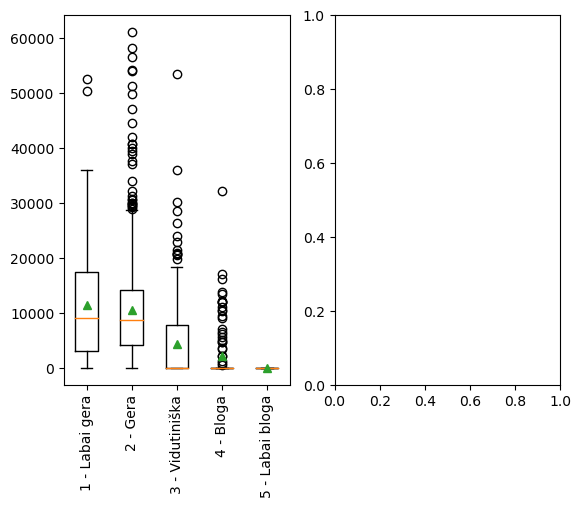

In [28]:
# pasidarau boxplot

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.boxplot([vilnius2020lg, vilnius2020g, vilnius2020v, vilnius2020b, vilnius2020lb], showmeans=True) 
# naudoju [] nes noriu nurodyti daugiau nei 1 sarasa. komanda bar atvaizduoja tik 1 sarasa su x,y
ax1.set_xticklabels(['1 - Labai gera', '2 - Gera', '3 - Vidutiniška', '4 - Bloga', '5 - Labai bloga'], rotation = 90)

plt.show()

In [29]:
ad2020Klaipeda = ad2020_gr.get_group(3) # cia turiu lentele, kurioje Klaipėdos info galiu pasiziureti per variables

In [31]:
# pasidarau lentele, kuri buti susijusi tik su Klaipeda
# Klaipedos duomenis atrinksiu su grupavimo ciklu for

ad2020Klaipeda = ad2020[ad2020['sl'] == 3] # nedidele atranka
ad2020KlaipedaSV = ad2020Klaipeda.groupby('ph010') # grupavimas
sv2020 = [] # nauja lentele
labels = ad2020KlaipedaSV.groups.keys()
for grupe in labels:
    sv2020.append(ad2020KlaipedaSV.get_group(grupe)['Eurais'].values) # atrenku ir sudedu i naujai sukurta lentele v14

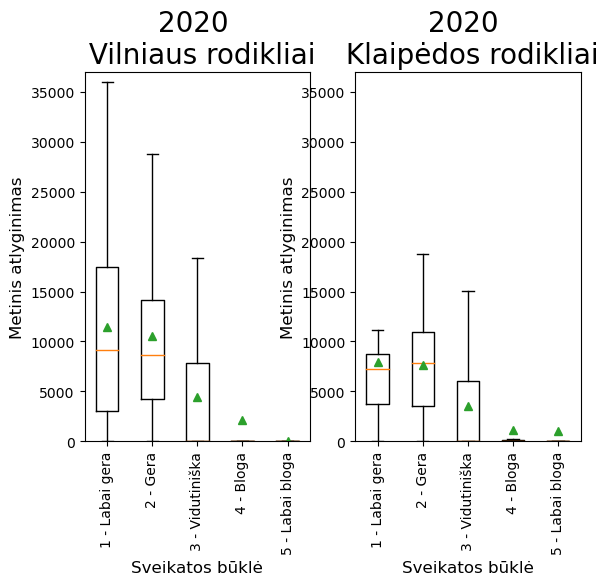

In [32]:
# outfliers - ekstremalus taskai, ju daug, nepatogu skaityti grafika, o grafikai susitelke apacioje
# interkvartile 

#showfliers metoda iterpiame i boxplot ir matysime grafika, kuriame nematysime fliers

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.boxplot([vilnius2020lg, vilnius2020g, vilnius2020v, vilnius2020b, vilnius2020lb], showmeans=True, showfliers=False) # naudojame [] nes noriu nurodyti daugiau nei 1 sarasa. komanda bar atvaizduoja tik 1 sarasa su x,y
ax1.set_xticklabels(['1 - Labai gera', '2 - Gera', '3 - Vidutiniška', '4 - Bloga', '5 - Labai bloga'], rotation = 90)
ax1.set_ylim(0,37000)
ax1.set_xlabel('Sveikatos būklė', fontsize=12)
ax1.set_ylabel('Metinis atlyginimas', fontsize=12)
ax1.set_title('2020 \n Vilniaus rodikliai', fontsize=20)

ax2.boxplot(sv2020, showmeans=True, showfliers=False)
ax2.set_xticklabels(['1 - Labai gera', '2 - Gera', '3 - Vidutiniška', '4 - Bloga', '5 - Labai bloga'], rotation = 90)
ax2.set_ylim(0,37000)
fig.get_tight_layout()
ax2.set_xlabel('Sveikatos būklė', fontsize=12)
ax2.set_ylabel('Metinis atlyginimas', fontsize=12)
ax2.set_title('2020 \n Klaipėdos rodikliai', fontsize=20)

plt.show()

Vilniaus ir Klaipėdos duomenų palyginimo rezultatai (2020 metai):

a) Sostinėje Vilniuje kuo didesnis atlyginimas, tuo geresnė sveikatos būklė. 
Reiškia, 2020 m. sostinėje sveiko gyvenimo būdo sąmoningumo lygis atitinka gebėjimų uždirbti aukštesnes pajamas lygį.

b) Uostamiestyje Klaipėdoje l.gera ir gera sveikatos būkle džiaugiasi tiek daugiausiai uždirbantys, tiek šiek tiek mažiau uždirbantys. 
Reiškia, 2020 m.uostamiestyje sveiko gyvenimo būdo sąmoningumo lygis iš dalies atitinka gebėjimų uždirbti aukštesnes pajamas lygį.

Vilniaus ir Klaipėdos duomenų palyginimas pagal 2010 ir 2020 metus

In [33]:
Vilnius2020 = ad2020[ad2020 ['sl'] == 1] # nauja dezute, kurioje laikomas atsakymas, prasoma is  saraso isrinkti duomenis i nauja sarasa su nurodytomis reiksmemis
Klaipeda2020 = ad2020[ad2020 ['sl'] == 3]

Vilnius2010 = ad2010[ad2010 ['sl'] == 1] 
Klaipeda2010 = ad2010[ad2010 ['sl'] == 3]

In [34]:
# nauja lentele ir atrenkam duomenis, kad is originalios lenteles
# veikia kaip zodyne pvz d = {'Vilnius':'sostine'} ---> d = {'Vilnius'} (lygtais taip uzrase)

# pandoje OR zymimas | (statmenas bruksnelis)
# pandoje AND zymimas &
Vilnius2020LG = ad2020[(ad2020 ['sl'] == '1') & (ad2020['ph010'] == 1)] 
Klaipeda2020LG = ad2020[(ad2020 ['sl'] == '3') & (ad2020['ph010'] == 1)] 

Vilnius2010LG = ad2010[(ad2010 ['sl'] == '1') & (ad2010['ph010'] == 1)] 
Klaipeda2010LG = ad2010[(ad2010 ['sl'] == '3') & (ad2010['ph010'] == 1)] 

In [35]:
# susikuriu kintamuosius 2020
# mean reikia skliausteliu. jis atrenka, paima sarasa ir ji atvaizduoja

vilnius2020lg = ad2020[(ad2020['sl'] == 1) & (ad2020['ph010'] == 1)]['py010n'].mean()
vilnius2020g = ad2020[(ad2020['sl'] == 1) & (ad2020['ph010'] == 2)]['py010n'].mean()
vilnius2020v = ad2020[(ad2020['sl'] == 1) & (ad2020['ph010'] == 3)]['py010n'].mean()
vilnius2020b = ad2020[(ad2020['sl'] == 1) & (ad2020['ph010'] == 4)]['py010n'].mean()
vilnius2020lb = ad2020[(ad2020['sl'] == 1) & (ad2020['ph010'] == 5)]['py010n'].mean()

klaipeda2020lg = ad2020[(ad2020['sl'] == 3) & (ad2020['ph010'] == 1)]['py010n'].mean()
klaipeda2020g = ad2020[(ad2020['sl'] == 3) & (ad2020['ph010'] == 2)]['py010n'].mean()
klaipeda2020v = ad2020[(ad2020['sl'] == 3) & (ad2020['ph010'] == 3)]['py010n'].mean()
klaipeda2020b = ad2020[(ad2020['sl'] == 3) & (ad2020['ph010'] == 4)]['py010n'].mean()
klaipeda2020lb = ad2020[(ad2020['sl'] == 3) & (ad2020['ph010'] == 5)]['py010n'].mean()

In [36]:
# susikuriu kintamuosius 2010

vilnius2010lg = ad2010[(ad2010['sl'] == 1) & (ad2010['ph010'] == 1)]['py010n'].mean()/3.4528
vilnius2010g = ad2010[(ad2010['sl'] == 1) & (ad2010['ph010'] == 2)]['py010n'].mean()/3.4528
vilnius2010v = ad2010[(ad2010['sl'] == 1) & (ad2010['ph010'] == 3)]['py010n'].mean()/3.4528
vilnius2010b = ad2010[(ad2010['sl'] == 1) & (ad2010['ph010'] == 4)]['py010n'].mean()/3.4528
vilnius2010lb = ad2010[(ad2010['sl'] == 1) & (ad2010['ph010'] == 5)]['py010n'].mean()/3.4528

klaipeda2010lg = ad2010[(ad2010['sl'] == 3) & (ad2010['ph010'] == 1)]['py010n'].mean()/3.4528
klaipeda2010g = ad2010[(ad2010['sl'] == 3) & (ad2010['ph010'] == 2)]['py010n'].mean()/3.4528
klaipeda2010v = ad2010[(ad2010['sl'] == 3) & (ad2010['ph010'] == 3)]['py010n'].mean()/3.4528
klaipeda2010b = ad2010[(ad2010['sl'] == 3) & (ad2010['ph010'] == 4)]['py010n'].mean()/3.4528
klaipeda2010lb = ad2010[(ad2010['sl'] == 3) & (ad2010['ph010'] == 5)]['py010n'].mean()/3.4528

In [37]:
print(vilnius2010lg)
Vilnius2010 = [vilnius2010lg, vilnius2010g, vilnius2010v, vilnius2010b, vilnius2010lb]
Klaipeda2010 = [klaipeda2010lg, klaipeda2010g, klaipeda2010v, klaipeda2010b, klaipeda2010lb]
Vilnius2020 = [vilnius2020lg, vilnius2020g, vilnius2020v, vilnius2020b, vilnius2020lb]
Klaipeda2020 = [klaipeda2020lg, klaipeda2020g, klaipeda2020v, klaipeda2020b, klaipeda2020lb]

5505.010706598105


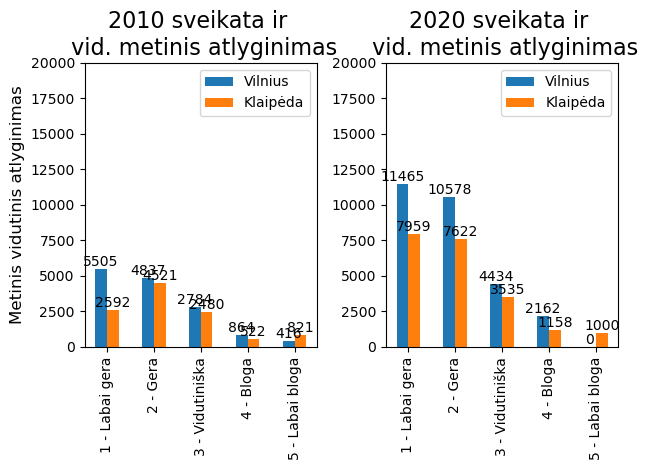

In [38]:
fig, (ax1, ax2) = plt.subplots(1,2)
w=0.25
labels = ['1 - Labai gera', '2 - Gera', '3 - Vidutiniška', '4 - Bloga', '5 - Labai bloga']
x = np.arange(0, len(labels))
A1=ax1.bar(x-w/2, Vilnius2010, width=w, label = 'Vilnius')
B1=ax1.bar(x+w/2, Klaipeda2010, width=w, label = 'Klaipėda')
ax1.bar_label(A1, fmt='%.0f')
ax1.bar_label(B1, fmt='%.0f')
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation = 90)
ax1.set_ylabel('Metinis vidutinis atlyginimas', fontsize=12)
ax1.legend()
ax1.set_title('2010 sveikata ir \n vid. metinis atlyginimas', fontsize=16)
ax1.set_ylim(0,20000)

A2=ax2.bar(x-w/2, Vilnius2020, width=w, label = 'Vilnius')
B2=ax2.bar(x+w/2, Klaipeda2020, width=w, label = 'Klaipėda')
ax2.set_xticks(x)
ax2.bar_label(A2, fmt='%.0f')
ax2.bar_label(B2, fmt='%.0f')
ax2.set_xticklabels(labels, rotation = 90)
ax2.legend()
ax2.set_title('2020 sveikata ir \n vid. metinis atlyginimas', fontsize=16)
ax2.set_xlabel('Sveikatos būklė', fontsize=12)
ax2.set_ylim(0,20000)

fig.tight_layout()
plt.show()

Vilniaus ir Klaipėdos duomenų palyginimo rezultatai, pokytis lyginant 2010 ir 2020 metus:

a) Matome teigiamą atlyginų pokytį per dešimtmetį (Pastaba: 2010 m. atlyginimai Lt konvertuoti į Eur)

b) Sostinėje Vilniuje kuo didesnis atlyginimas, tuo geresnė sveikatos būklė. Dešimtmetis įtakos šiam teiginiui įtakos nepadarė.
Reiškia, tiek 2010, tiek 2020 sostinėje sveiko gyvenimo būdo sąmoningumo lygis atitinka gebėjimų uždirbti aukštesnes pajamas lygį. 

c) Uostamiestyje Klaipėdoje:
2020 m. l.gera ir gera sveikatos būkle džiaugiasi tiek daugiausiai uždirbantys, tiek šiek tiek mažiau uždirbantys. 
2010 m. l.gera sveikatos būkle džiaugėsi šiek tiek mažiau uždirbantys asmenys, o didžiausias pajamas gaunantys asmenys turėjo ne pačią geriausia sveikatos būklę. 2010 m. sveiko gyvenimo būdo sąmoningumo lygis maža dalimi atitiko gebėjimų uždirbti aukštesnes pajamas lygį. 
Reiškia, dešimtmetis turėjo įtakos teigiamam pokyčiui ir sveiko gyvenimo būdo sąmoningumo lygis beveik atitinka gebėjimų uždirbti aukštesnes pajamas lygį.

Kodai su sql užklausomis

Ar yra ryšys tarp respondentų atlyginimų ir amžiaus? Lyginant 2010 ir 2020

In [39]:
pip install mysql-connector-python==8.0.28

Note: you may need to restart the kernel to use updated packages.


In [40]:
import mysql.connector as cnt # mysql konektorius
import numpy as np
import matplotlib.pyplot as plt

In [41]:
DB = cnt.connect(
    host ='localhost',
    port = 3317,
    user = 'root',
    password = 'zzzSSS'
)

c = DB.cursor() # sukuriame kursoriaus objekta

In [42]:
c.execute('use sakila') # suaktyvina duomenu baze; sis irasas negrazina atsakymo
c.execute('show tables') # si komanda grazina atsakyma; show tables yra sql komanda
ats = c.fetchall() # parodys visus duombazes lenteliu pavadinimus
print(ats)

[('actor',), ('actor_info',), ('ad',), ('ad2010',), ('ad2020',), ('address',), ('category',), ('city',), ('country',), ('customer',), ('customer_list',), ('film',), ('film_actor',), ('film_category',), ('film_list',), ('film_text',), ('inventory',), ('language',), ('nicer_but_slower_film_list',), ('payment',), ('rental',), ('sales_by_film_category',), ('sales_by_store',), ('staff',), ('staff_list',), ('store',)]


In [43]:
sql = """
select * from ad2020
"""
c.execute(sql)
ats = c.fetchall()
for eilute in ats:
    print(eilute) # visi eiluciu duomenys

(2, None, None, None, None, 1000040002, None, 75, 1000040003, 2, 13, 1, 0, 0, 1, 0, 1991, 1, 2, None, None, None, None, 2, None, 1, None, 1, 10, 40, None, 10000400, 0, 0, 0, 0, 0, 1, 10, None, None, 12, 2, 0, 1, 1, 0, 0, 300, 3, 0, 19, 0, 7381.18, 1, 0, 1, 0, 200.65, 11262.33, 2, 2, 159.04641, 0, 0, 25, None, 3, 1, 0, 2, 0, 0, None, 0, 0, 0, 1, 48, 0)
(2, None, None, None, None, 1000040003, None, 54, 1000040002, None, 13, 1, 0, 0, 1, 0, 1995, 1, 2, None, None, None, None, 2, None, 1, None, 1, 10, 40, None, 10000400, 0, 0, 0, 0, 3450, 1, 80, None, None, 5, 2, 0, 1, 1, 0, 0, 400, 3, 0, 20, 10, 7081.4, 1, 0, 1, 15, 215.9, 11247.04, 2, 1, 159.04641, 0, 0, 22, None, 3, 1, 7, 2, 0, 0, None, 0, 0, 0, 2, 46, 0)
(1, None, None, None, None, 1000040004, None, 81, None, None, 13, 1, 0, 0, 1, 0, 2012, 1, 2, None, None, None, 1000040002, 2, None, 1, None, 1, 10, 40, 1000040003, 10000400, 0, 0, 0, 0, 0, 1, 22, None, None, 12, 2, 0, 1, 1, 0, 0, 344, 3, 0, 19, 0, 15357.88, 3, 0, 1, 0, 500.85, 26002.73,

In [44]:
# atlyginimo vidurkio, min ir max skaiciavimas

sql = """select avg(py010n), min(py010n), max(py010n)
from ad2020
where py010n != 0"""

c.execute(sql)
ats2020 = c.fetchall()
vid2020 = ats2020[0][0]
mn2020 = ats2020[0][1] # min negalime naudoti, nes sugadinsime python funkcija
mx2020 = ats2020[0][2]
x2020 = [1,2,3]
print(vid2020, 'vidurkis 2020')
print(mn2020, 'min atlyginimas 2020')
print(mx2020, 'max atlyginimas 2020')

sql = """select avg(py010n), min(py010n), max(py010n)
from ad2010
where py010n != 0"""

c.execute(sql)
ats2010 = c.fetchall()
vid2010 = ats2010[0][0]/3.4528
mn2010 = ats2010[0][1]/3.4528 # min negalime naudoti, nes sugadinsime python funkcija
mx2010 = ats2010[0][2]/3.4528
x2010 = [1,2,3]
print(vid2010, 'vidurkis 2010 eurais')
print(mn2010, 'min atlyginimas 2010 eurais')
print(mx2010, 'max atlyginimas 2010 eurais')

8264.499577105375 vidurkis 2020
10.53 min atlyginimas 2020
78000.0 max atlyginimas 2020
4316.063337281154 vidurkis 2010 eurais
1.7811631139944395 min atlyginimas 2010 eurais
55879.4109128823 max atlyginimas 2010 eurais


In [45]:
# kokio amžiaus respondentai 2020 ir 2010? Imamos reikšmės nuo 16 metų, nes palyginimas bus atliekamas su atlyginimais

sql = """select avg(age), min(age), max(age)
from ad2020
where age > 15"""

c.execute(sql)
ats2020amzius = c.fetchall()
vid2020amzius = ats2020amzius[0][0]
mn2020amzius = ats2020amzius[0][1] # min negalime naudoti, nes sugadinsime python funkcija
mx2020amzius = ats2020amzius[0][2]
x2020amzius = [1,2,3]
print(vid2020amzius, 'vidurkis 2020')
print(mn2020amzius, 'minimalus amžius 2020')
print(mx2020amzius, 'maximalus amžius 2020')

sql = """select avg(age), min(age), max(age)
from ad2010
where age > 15"""

c.execute(sql)
ats2010amzius = c.fetchall()
vid2010amzius = ats2010amzius[0][0]
mn2010amzius = ats2010amzius[0][1] # min negalime naudoti, nes sugadinsime python funkcija
mx2010amzius = ats2010amzius[0][2]
x2010amzius = [1,2,3]
print(vid2010amzius, 'vidurkis 2010')
print(mn2010amzius, 'minimalus amžius 2010')
print(mx2010amzius, 'maximalus amžius 2010')

53.5363 vidurkis 2020
16 minimalus amžius 2020
96 maximalus amžius 2020
49.5779 vidurkis 2010
16 minimalus amžius 2010
99 maximalus amžius 2010


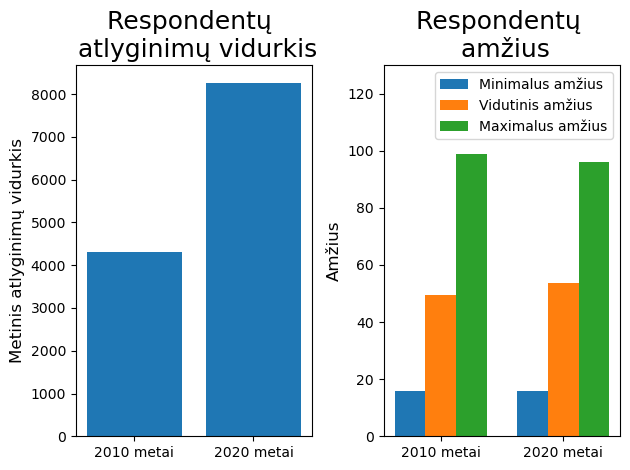

In [46]:
fig, (ax1, ax2) = plt.subplots(1,2)

#pirmas grafikas
y = [vid2010, vid2020]
x = [1,2]
ax1.bar(x, y)
ax1.set_xticks(x)
ax1.set_xticklabels(['2010 metai', '2020 metai'])
ax1.set_ylabel('Metinis atlyginimų vidurkis', fontsize=12)
ax1.set_title('Respondentų \n atlyginimų vidurkis', fontsize=18)

# antras grafikas
x2 = np.asarray([1,2])
minamzius = [mn2010amzius, mn2020amzius]
vidamzius = [vid2010amzius, vid2020amzius]
maxamzius = [mx2010amzius, mx2020amzius]

w = 0.25
ax2.bar(x2-w, minamzius, label='Minimalus amžius', width=w)
ax2.bar(x2, vidamzius, label='Vidutinis amžius', width=w)
ax2.bar(x2+w, maxamzius, label='Maximalus amžius', width=w)

ax2.set_xticks(x2)
ax2.set_xticklabels(['2010 metai', '2020 metai'])
ax2.set_ylabel('Amžius', fontsize=12)
ax2.set_title('Respondentų \n amžius', fontsize=18)
ax2.set_ylim(0,130)
ax2.legend()

fig.tight_layout()

plt.show()

Respondentų atlyginimų vidurkis per dešimtmetį augo dvigubai. Per dešimtmetį respondentų vidutinis amžius nežymiai padidėjo (2010 - 49,5, 2020 - 53,5), o max amžius nežymiai sumažėjo (2010 - 99, 2020 - 96). Tai gali reikšti, kad 2020 apklausoje dalyvavo didesnis kiekis ne tik vyresnių, bet ir didesnius atlyginimus gaunantys asmenys. Tai rodo ryšį tarp amžiaus ir atlyginimo dydžio.

Ar yra ryšys tarp respondentų atlyginimų dydžio ir jų susitikimų su draugais kavinėje dažnumo lyginant 2010 ir 2020 duomenis?

In [47]:
sql = """
select count(pd050) as Susitikimai
from ad2020
where pd050 = "{}"
"""
c.execute(sql.format(3))
ats = c.fetchall()
tryssusit2020 = ats[0][0]

c.execute(sql.format(2))
ats = c.fetchall()
dususit2020 = ats[0][0]

c.execute(sql.format(1))
ats = c.fetchall()
vienassusit2020 = ats[0][0]

sql = """
select count(rb090) as Lytis
from ad2010
where rb090 = "{}"
"""

c.execute(sql.format(3))
ats = c.fetchall()
tryssusit2010 = ats[0][0]

c.execute(sql.format(2))
ats = c.fetchall()
dususit2010 = ats[0][0]

c.execute(sql.format(1))
ats = c.fetchall()
vienassusit2010 = ats[0][0]

print(tryssusit2020, 'nurodė 3 susitikimai per mėn. 2020')
print(dususit2020, 'nurodė 2 susitikimai per mėn. 2020')
print(vienassusit2020, 'nurodė 1 susitikimas per mėn. 2020')
print(tryssusit2010, 'nurodė 3 susitikimai per mėn. 2010')
print(dususit2010, 'nurodė 2 susitikimai per mėn. 2010')
print(vienassusit2010, 'nurodė 1 susitikimas per mėn. 2010')

1940 nurodė 3 susitikimai per mėn. 2020
1100 nurodė 2 susitikimai per mėn. 2020
6756 nurodė 1 susitikimas per mėn. 2020
0 nurodė 3 susitikimai per mėn. 2010
7014 nurodė 2 susitikimai per mėn. 2010
6221 nurodė 1 susitikimas per mėn. 2010


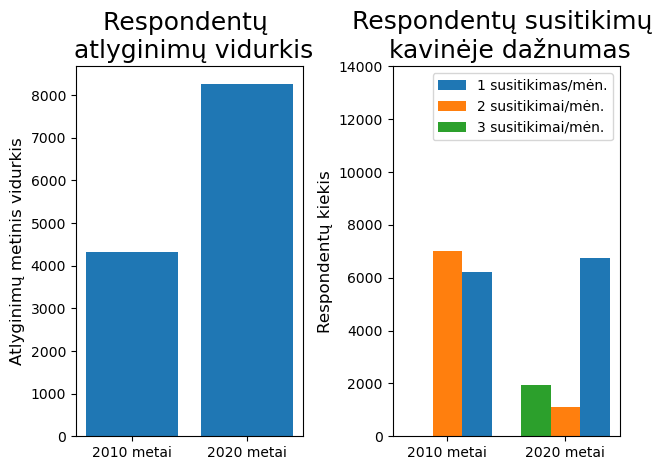

In [48]:
fig, (ax1, ax2) = plt.subplots(1,2)

#pirmas grafikas
y = [vid2010, vid2020]
x = [1,2]
ax1.bar(x, y)
ax1.set_xticks(x)
ax1.set_xticklabels(['2010 metai', '2020 metai'])
ax1.set_ylabel('Atlyginimų metinis vidurkis', fontsize=12)
ax1.set_title('Respondentų \n atlyginimų vidurkis', fontsize=18)

x = np.asarray([1,2])
tryssusit = [tryssusit2010, tryssusit2020]
dususit = [dususit2010, dususit2020]
vienassusit = [vienassusit2010, vienassusit2020]

w = 0.25
ax2.bar(x+w, vienassusit, label='1 susitikimas/mėn.', width=w)
ax2.bar(x, dususit, label='2 susitikimai/mėn.', width=w)
ax2.bar(x-w, tryssusit, label='3 susitikimai/mėn.', width=w)

ax2.set_xticks(x)
ax2.set_xticklabels(['2010 metai', '2020 metai'])
ax2.set_ylabel('Respondentų kiekis', fontsize=12)
ax2.set_title('Respondentų susitikimų \n kavinėje dažnumas', fontsize=18)
ax2.set_ylim(0,14000)

ax2.legend()
fig.tight_layout()

plt.show()

Respondentų atlyginimų vidurkis per dešimtmetį augo dvigubai. Per dešimtmetį beveik nepakito respondentų tradicijos mastas dėl susitikimo su draugais kavinėje 1 kartą per mėn.
Tuo tarpu 2 kartų/mėn. susitikimų kiekis sumažėjo 6 kartus, o 3 kartų/mėn. kiekis 2020 m. šiek tiek dažnesnis nei pastarasis 2 k./mėn., tačiau tokio varianto nebuvo 2010 m. Kadangi 2 ir 3 k/mėn. susitikimų kiekiai 2020 m. nesiekia nei pusės kiekio 2 k./mėn. 2010 m., todėl galima daryti prielaidą, kad per dešimtmetį ženkliai sumažėjo susitikimų > 1 k./mėn. kiekis, nors tuo tarpu atlyginimų dydis iašugo dvigubai. Tai reikštų, kad atlyginimo dydis galimai neturi ryšio su susitikimų su draugais kavinėje kiekiu per mėn. Galimai yra kiti veiksniai, darantys įtaką respondentų sprendimams dėl susitikimų kavinėje dažnio.

Kiek respondentų dalyvavo tyrime 2020 ir 2010 bei kurių daugiau dalyvavo: moterų ar vyrų?

In [49]:
sql = """select count(rb090)
from ad2020"""

c.execute(sql)
ats = c.fetchall()
resp2020 = ats[0][0]

sql = """select count(rb090)
from ad2010"""

c.execute(sql)
ats = c.fetchall()
resp2010 = ats[0][0]

print(resp2020, 'Iš viso respondentų 2020')
print(resp2010, 'Iš viso respondentų 2010')

11512 Iš viso respondentų 2020
13235 Iš viso respondentų 2010


In [50]:
sql = """
select count(rb090) as Lytis
from ad2020
where rb090 = "{}"
"""
c.execute(sql.format(2))
ats = c.fetchall()
mot2020 = ats[0][0]

c.execute(sql.format(1))
ats = c.fetchall()
vyr2020 = ats[0][0]

sql = """
select count(rb090) as Lytis
from ad2010
where rb090 = "{}"
"""

c.execute(sql.format(2))
ats = c.fetchall()
mot2010 = ats[0][0]

c.execute(sql.format(1))
ats = c.fetchall()
vyr2010 = ats[0][0]

print(mot2020, 'mot2020')
print(vyr2020, 'vyr2020')
print(mot2010, 'mot2010')
print(vyr2010, 'vyr2010')

6374 mot2020
5138 vyr2020
7014 mot2010
6221 vyr2010


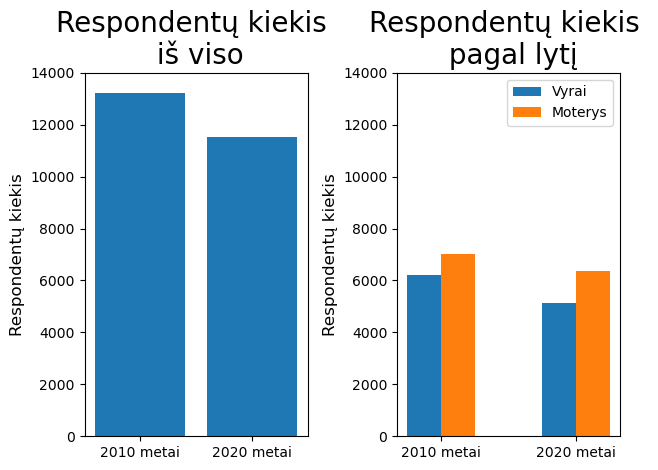

In [52]:
fig, (ax1, ax2) = plt.subplots(1,2)

y = [resp2010, resp2020]
x = [1,2]
ax1.bar(x, y)
ax1.set_xticks(x)
ax1.set_xticklabels(['2010 metai', '2020 metai'])
ax1.set_ylabel('Respondentų kiekis', fontsize=12)
ax1.set_title('Respondentų kiekis \n iš viso', fontsize=20)
ax1.set_ylim(0,14000)

x = np.asarray([1,2])
vyrai = [vyr2010, vyr2020]
moterys = [mot2010, mot2020]

w = 0.25
ax2.bar(x-w/2, vyrai, label='Vyrai', width=w)
ax2.bar(x+w/2, moterys, label='Moterys', width=w)

ax2.set_xticks(x)
ax2.set_xticklabels(['2010 metai', '2020 metai'])
ax2.set_ylabel('Respondentų kiekis', fontsize=12)
ax2.set_title('Respondentų kiekis \n pagal lytį', fontsize=20)
ax2.set_ylim(0,14000)

ax2.legend()
fig.tight_layout()

plt.show()

Moterų respondenčių buvo daugiau tiek 2010, tiek 2020 (ir 2020 dar didesniu skirtumu moterų daugiau), nors bendras respondentų skaičius mažėjo lyginant 2010 ir 2020 metus.